In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns 
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Adult%20Census%20Income/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

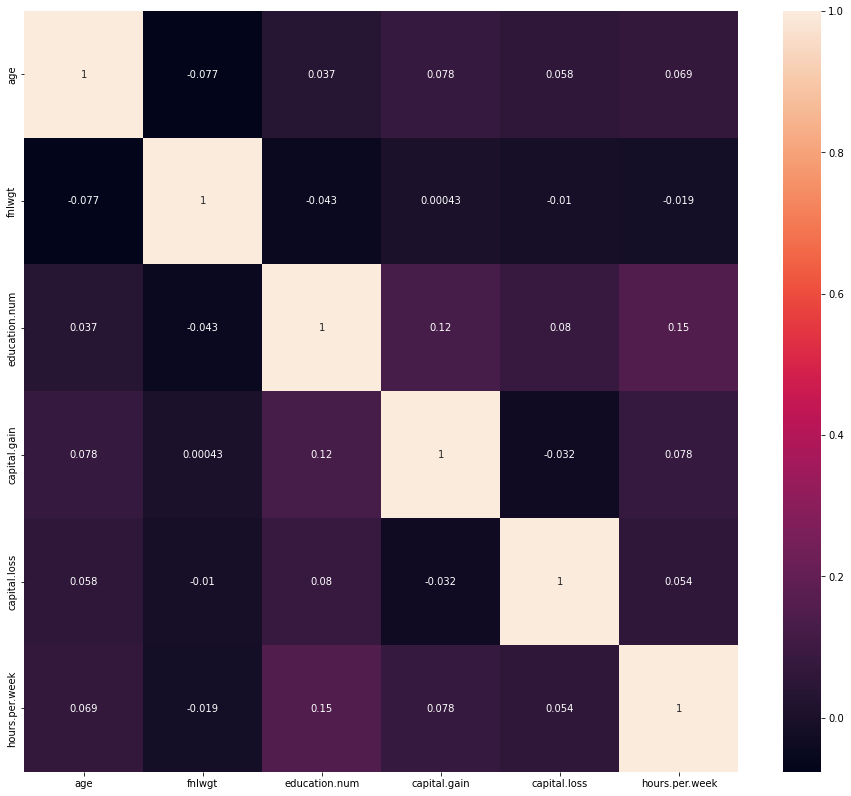

In [4]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), annot = True)

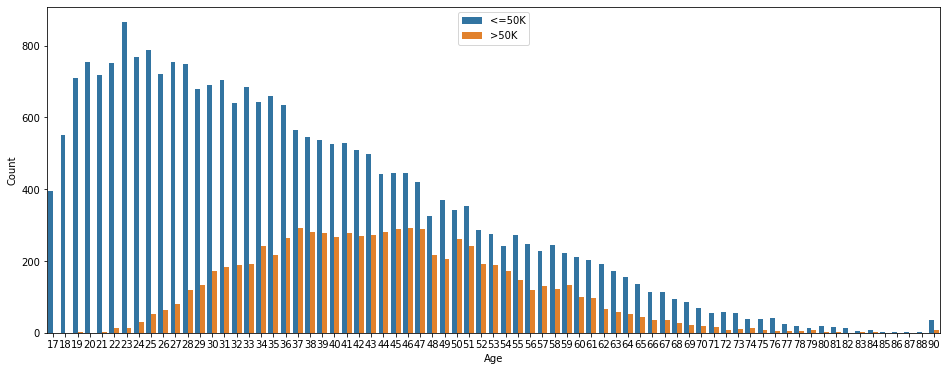

In [5]:
plt.figure(figsize=(16,6))
sns.countplot(x=df.age, hue=df.income)
plt.title("")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

In [6]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

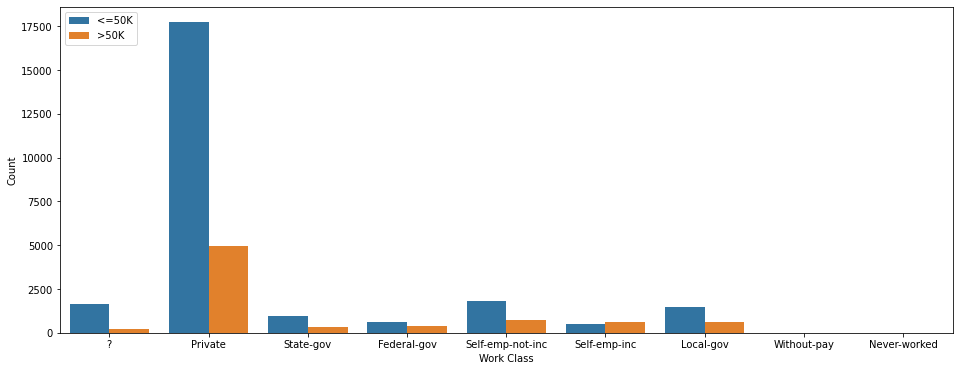

In [7]:
plt.figure(figsize=(16,6))
sns.countplot(x=df.workclass, hue=df.income)
plt.title("")
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.legend()

In [8]:
df[df['workclass']=='Without-pay'].count()

age               14
workclass         14
fnlwgt            14
education         14
education.num     14
marital.status    14
occupation        14
relationship      14
race              14
sex               14
capital.gain      14
capital.loss      14
hours.per.week    14
native.country    14
income            14
dtype: int64

In [9]:
df[df['workclass']=='Never-worked'].count()

age               7
workclass         7
fnlwgt            7
education         7
education.num     7
marital.status    7
occupation        7
relationship      7
race              7
sex               7
capital.gain      7
capital.loss      7
hours.per.week    7
native.country    7
income            7
dtype: int64

In [10]:
df = df[df.workclass != 'Never-worked']
df = df[df.workclass != 'Without-pay']
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov'], dtype=object)

In [11]:
print(df.education.unique())
print(df['education.num'].unique())

['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]


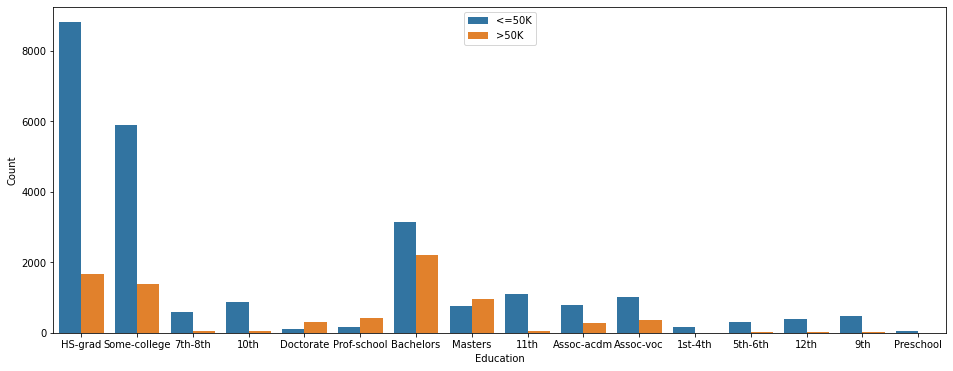

In [12]:
plt.figure(figsize=(16,6))
sns.countplot(x=df.education, hue=df.income)
plt.title("")
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend()

In [13]:
e = df.education.unique()

print('Percentage of eduction level who earn >50K ')
for i in e:
  val = len(df[(df.education == i) & (df.income == '>50K')])
  tot = len(df[df.education == i])
  print(i)
  print((val/tot)*100)

Percentage of eduction level who earn >50K 
HS-grad
15.966066151939758
Some-college
19.0365083722207
7th-8th
6.211180124223603
10th
6.659505907626208
Doctorate
74.09200968523002
Prof-school
73.4375
Bachelors
41.47525676937442
Masters
55.65873476494486
11th
5.110732538330494
Assoc-acdm
24.859287054409005
Assoc-voc
26.121562952243128
1st-4th
3.571428571428571
5th-6th
4.804804804804805
12th
7.621247113163972
9th
5.252918287937743
Preschool
0.0


In [14]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

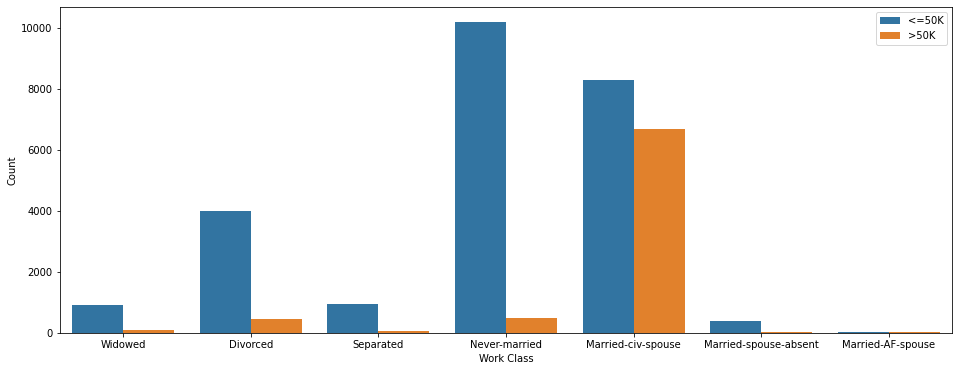

In [15]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['marital.status'], hue=df.income)
plt.title("")
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.legend()

In [16]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [17]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

Text(0.5, 1.0, 'Relationships')

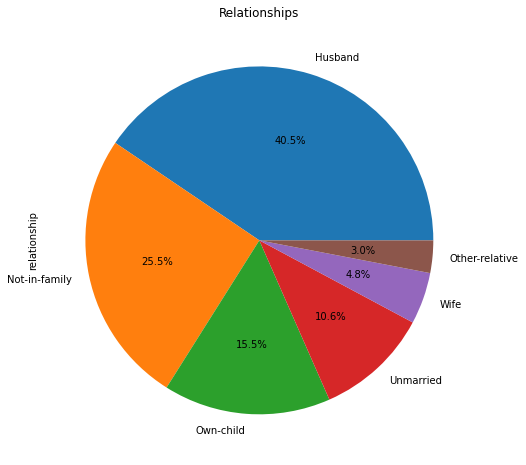

In [18]:
data = df['relationship'].value_counts()
plt.figure(figsize=(10,8))
data.plot.pie(autopct="%.1f%%")
plt.title('Relationships')

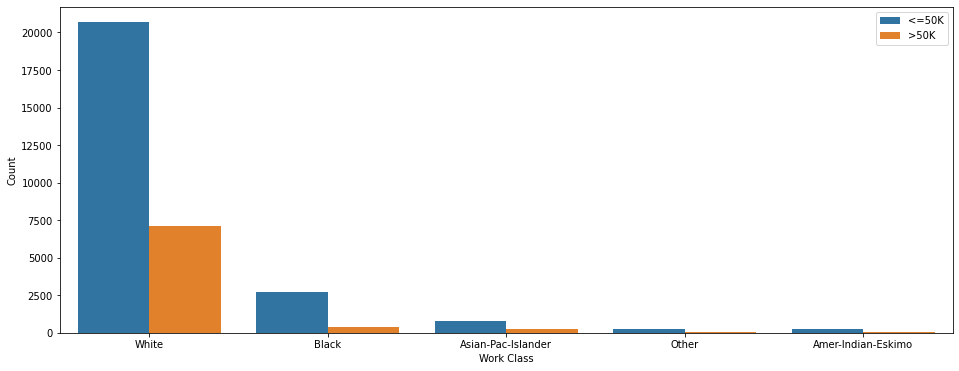

In [19]:
plt.figure(figsize=(16,6))
sns.countplot(x=df.race, hue=df.income)
plt.title("")
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.legend()

In [20]:
race = df.race.unique()

print('Percentage of race who earn >50K ')
for i in race:
  val = len(df[(df.race == i) & (df.income == '>50K')])
  tot = len(df[df.race == i])
  print(i)
  print((val/tot)*100)

Percentage of race who earn >50K 
White
25.601640346775064
Black
12.399871835950016
Asian-Pac-Islander
26.589595375722542
Other
9.22509225092251
Amer-Indian-Eskimo
11.57556270096463


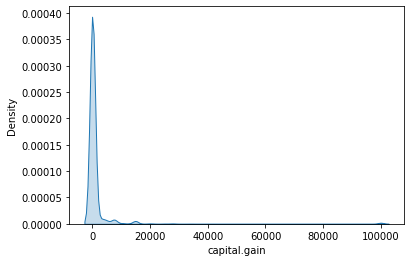

In [21]:
sns.kdeplot(data=df['capital.gain'], shade=True)
plt.show()

<AxesSubplot:xlabel='hours.per.week', ylabel='Density'>

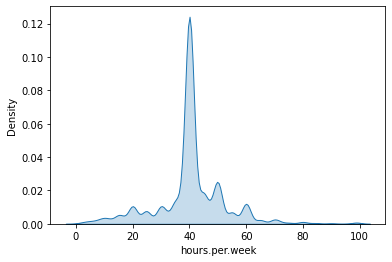

In [22]:
sns.kdeplot(data=df['hours.per.week'], shade=True)

In [23]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

Text(0.5, 1.0, 'Native Countries')

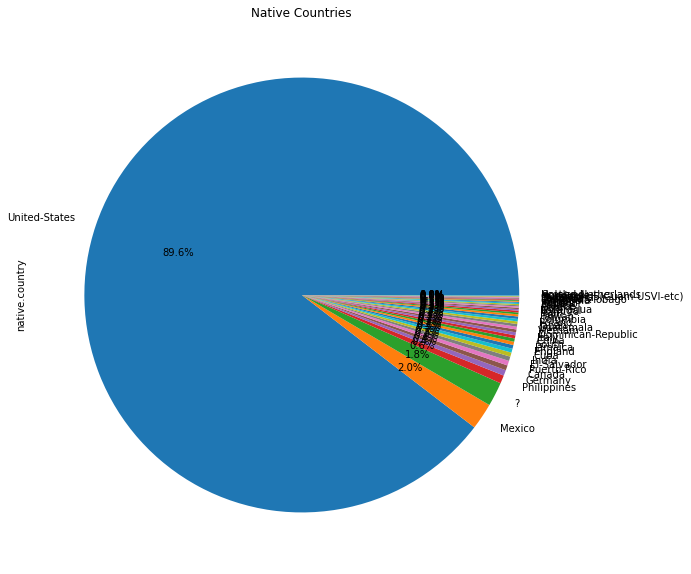

In [24]:
data = df['native.country'].value_counts()
plt.figure(figsize=(10,10))
data.plot.pie(autopct="%.1f%%")
plt.title('Native Countries')

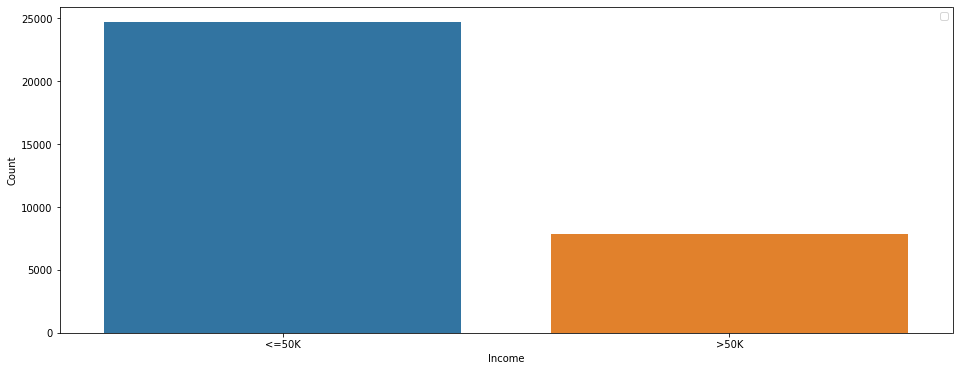

In [25]:
inc = df.income.value_counts()
plt.figure(figsize=(16,6))
sns.countplot(x=df['income'])
plt.title("")
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend()

In [26]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [27]:
X = df.drop(['education', 'income', 'occupation'], axis='columns')
y = df.income

X.head()

,age,workclass,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,77053,9,Widowed,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,9,Widowed,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,186061,10,Widowed,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,4,Divorced,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,10,Separated,Own-child,White,Female,0,3900,40,United-States


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['workclass', 'marital.status', 'relationship', 'race', 'sex', 'native.country']
for i in col:
  X[i] = le.fit_transform(X[i])

X.head()

,age,workclass,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,0,77053,9,6,1,4,0,0,4356,40,39
1,82,3,132870,9,6,1,4,0,0,4356,18,39
2,66,0,186061,10,6,4,2,0,0,4356,40,39
3,54,3,140359,4,0,4,4,0,0,3900,40,39
4,41,3,264663,10,5,3,4,0,0,3900,40,39


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
X[cols] = scaler.fit_transform(X[cols])

X.head()

,age,workclass,fnlwgt,education.num,marital.status,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1.000000,0,0.043987,9,6,1,4,0,0.0,1.000000,0.397959,39
1,0.890411,3,0.081896,9,6,1,4,0,0.0,1.000000,0.173469,39
2,0.671233,0,0.118021,10,6,4,2,0,0.0,1.000000,0.397959,39
3,0.506849,3,0.086982,4,0,4,4,0,0.0,0.895317,0.397959,39
4,0.328767,3,0.171404,10,5,3,4,0,0.0,0.895317,0.397959,39


In [30]:
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(12, input_shape=(12,), activation='relu'),
                          keras.layers.Dense(12, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

2021-11-11 18:17:49.762517: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 18:17:49.869298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 18:17:49.870039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 18:17:49.871307: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10
814/814 [==============================] - 3s 2ms/step - loss: 0.7962 - accuracy: 0.7208
Epoch 2/10
814/814 [==============================] - 2s 2ms/step - loss: 0.4417 - accuracy: 0.7980
Epoch 3/10
814/814 [==============================] - 2s 2ms/step - loss: 0.4122 - accuracy: 0.8098
Epoch 4/10
814/814 [==============================] - 2s 2ms/step - loss: 0.3912 - accuracy: 0.8171
Epoch 5/10
814/814 [==============================] - 2s 3ms/step - loss: 0.3792 - accuracy: 0.8197
Epoch 6/10
814/814 [==============================] - 2s 2ms/step - loss: 0.3716 - accuracy: 0.8237
Epoch 7/10
814/814 [==============================] - 2s 2ms/step - loss: 0.3677 - accuracy: 0.8280
Epoch 8/10
814/814 [==============================] - 2s 2ms/step - loss: 0.3615 - accuracy: 0.8295
Epoch 9/10
814/814 [==============================] - 2s 2ms/step - loss: 0.3585 - accuracy: 0.8301
Epoch 10/10
814/814 [==============================] - 2s 3ms/step - loss: 0.3542 - accuracy: 0.8342

In [31]:
pred = model.predict(X_test)
prediction = []
for element in pred:
    if element > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
prediction[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4903
           1       0.77      0.44      0.56      1605

    accuracy                           0.83      6508
   macro avg       0.81      0.70      0.73      6508
weighted avg       0.82      0.83      0.81      6508

